In [350]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [351]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [352]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier

# Read the CSV and Perform Basic Data Cleaning

In [353]:
df = pd.read_csv("Resources/archive.zip")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [354]:
#df.info()

In [355]:
print(df['koi_fpflag_nt'].unique())
print(df['koi_disposition'].unique())
print(df['koi_tce_plnt_num'].unique())
print(df['kepoi_name'].nunique())
print(df['koi_tce_delivname'].unique())


[0 1]
['CONFIRMED' 'FALSE POSITIVE']
[1. 2. 3. 4. 5. 6. 7.]
2269
['q1_q17_dr25_tce']


In [356]:
columnslist = list(df.columns)
#print(columnslist)

In [357]:
columnslist.remove('rowid')
columnslist.remove('kepid')
columnslist.remove('koi_score')
columnslist.remove('kepler_name')
columnslist.remove('koi_fpflag_nt')
columnslist.remove('koi_fpflag_ss')
columnslist.remove('koi_fpflag_co')
columnslist.remove('koi_fpflag_ec')
columnslist.remove('koi_period_err1')
columnslist.remove('koi_period_err2')
columnslist.remove('koi_time0bk')
columnslist.remove('koi_time0bk_err1')
columnslist.remove('koi_time0bk_err2')
columnslist.remove('koi_impact_err1')
columnslist.remove('koi_impact_err2')
columnslist.remove('koi_duration_err1')
columnslist.remove('koi_duration_err2')
columnslist.remove('koi_depth_err1')
columnslist.remove('koi_depth_err2')
columnslist.remove('koi_prad_err1')
columnslist.remove('koi_prad_err2')
columnslist.remove('koi_insol_err1')
columnslist.remove('koi_insol_err2')
columnslist.remove('koi_steff_err1')
columnslist.remove('koi_steff_err2')
columnslist.remove('koi_slogg_err1')
columnslist.remove('koi_slogg_err2')
columnslist.remove('koi_srad_err1')
columnslist.remove('koi_srad_err2')

new_df = df[columnslist]
new_df.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,K00752.01,CONFIRMED,CANDIDATE,9.488036,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,CANDIDATE,54.418383,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
4,K00755.01,CONFIRMED,CANDIDATE,2.525592,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,K00756.01,CONFIRMED,CANDIDATE,11.094321,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,K00756.02,CONFIRMED,CANDIDATE,4.134435,0.762,3.1402,686.0,2.77,1160.0,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714


In [358]:
new_df[['koi_pdisposition']].value_counts()

koi_pdisposition
CANDIDATE           2224
FALSE POSITIVE        45
dtype: int64

In [359]:
# Remove False positives

new_df = new_df.loc[new_df['koi_pdisposition'] == 'CANDIDATE'] 
new_df.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,K00752.01,CONFIRMED,CANDIDATE,9.488036,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,CANDIDATE,54.418383,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
4,K00755.01,CONFIRMED,CANDIDATE,2.525592,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,K00756.01,CONFIRMED,CANDIDATE,11.094321,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,K00756.02,CONFIRMED,CANDIDATE,4.134435,0.762,3.1402,686.0,2.77,1160.0,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714


In [360]:
new_columnslist = list(new_df.columns)
#print(new_columnslist)
#new_columnslist

In [361]:
new_df.describe()

,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,25.423677,0.425751,4.259389,1113.451349,2.822176,839.862860,345.910108,88.144424,1.448741,5480.598921,4.412345,1.060889,290.949771,44.396055,14.349678
std,43.529530,0.332076,2.609434,2623.304815,3.129148,382.258961,1226.017021,287.659425,0.822577,675.133911,0.229559,0.628072,4.752046,3.577500,1.219133
min,0.341842,0.000000,0.427900,24.300000,0.490000,166.000000,0.180000,6.000000,1.000000,2703.000000,2.410000,0.118000,280.249450,36.577381,8.224000
25%,5.031473,0.079750,2.505967,219.375000,1.530000,554.750000,22.402500,20.300000,1.000000,5177.750000,4.287750,0.808000,287.295440,41.521266,13.696750
50%,11.131531,0.390000,3.562000,460.100000,2.170000,783.000000,88.905000,31.500000,1.000000,5618.500000,4.455000,0.969000,291.111880,44.376525,14.602500
75%,25.205063,0.746000,5.266250,889.950000,2.920000,1038.000000,274.875000,54.300000,2.000000,5933.250000,4.557000,1.200000,294.774662,47.258768,15.262000
max,469.613090,1.300000,24.108000,36912.000000,77.760000,3559.000000,37958.270000,5945.900000,7.000000,9565.000000,5.274000,19.530000,301.720760,52.149132,17.475000


<AxesSubplot:xlabel='ra', ylabel='dec'>

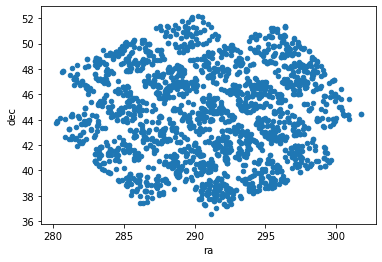

In [362]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'ra', y = 'dec')

<AxesSubplot:xlabel='koi_time0bk', ylabel='koi_period'>

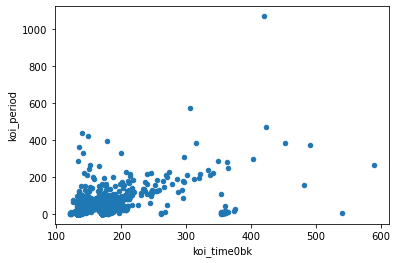

In [363]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_time0bk', y = 'koi_period')

<AxesSubplot:xlabel='koi_period', ylabel='koi_duration'>

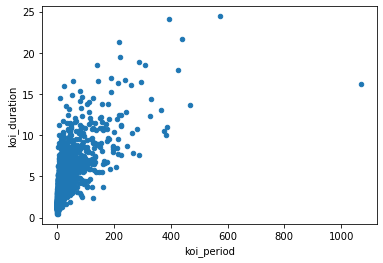

In [364]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_period', y = 'koi_duration')

<AxesSubplot:xlabel='koi_steff', ylabel='koi_slogg'>

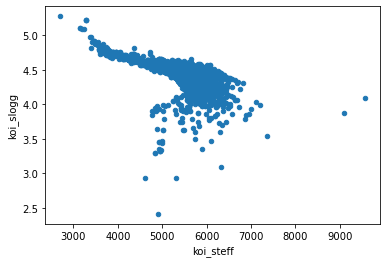

In [365]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_steff', y = 'koi_slogg')

<AxesSubplot:xlabel='koi_slogg', ylabel='koi_srad'>

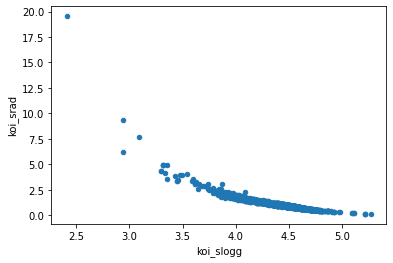

In [366]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_slogg', y = 'koi_srad')

# Select your features (columns)

In [367]:
featured_columns_list = list(new_df.columns)
featured_columns_list

new_df.dtypes

featured_columns_list.remove('kepoi_name')
featured_columns_list.remove('koi_disposition')
featured_columns_list.remove('koi_pdisposition')
featured_columns_list.remove('koi_tce_delivname')

featured_df = new_df[featured_columns_list]
featured_df.head()
featured_df.dtypes


koi_period          float64
koi_impact          float64
koi_duration        float64
koi_depth           float64
koi_prad            float64
koi_teq             float64
koi_insol           float64
koi_model_snr       float64
koi_tce_plnt_num    float64
koi_steff           float64
koi_slogg           float64
koi_srad            float64
ra                  float64
dec                 float64
koi_kepmag          float64
dtype: object

In [368]:
Data = featured_df.drop(columns = 'koi_tce_plnt_num').values
target = df['koi_tce_plnt_num']
Data = preprocessing.MinMaxScaler().fit_transform(Data)
target = preprocessing.LabelEncoder().fit_transform(target)




In [ ]:
clf = DecisionTreeClassifier(random_state=999)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)


scoring_metric = 'accuracy'                                     

In [ ]:
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)

In [ ]:
cv_results_full

In [ ]:
cv_results_full.mean().round(3)

In [ ]:
num_features = 5

https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

In [369]:
# Set features. This will also be used as your x values.
selected_features = df[['kepid', 'kepoi_name', 'kepler_name', 'features', 'here']]

KeyError: "['features', 'here'] not in index"

# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)

## DATA SET COLUMNS

###### koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the frction of iterations where the Robovetter yields a disposition of CANDIDATE.


###### koi_pdisposition: The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. (koi_score used to calculate this category.)

###### koi_fpflag_nt: Not Transit-Like Flag
###### koi_fpflag_ss: Stellar Eclipse Flag
###### koi_fpflag_co: Centroid Offset Flag
###### koi_fpflag_ec: Ephemeris Match Indicates Contamination Flag
###### koi_period: Orbital Period
###### koi_period_err1 and koi_period_err2: Uncertainties Column (positive and negative)
###### koi_time0: Transit Epoch (BJD - 2,454,833.0)
###### koi_impact: The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.	Impact Parameter.
###### koi_impact_err1 and koi_impact_err2: Uncertainties Column (positive and negative)
###### koi_duration:	Transit Duration (hours). The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact
###### koi_duration_err1 and koi_duration_err2: Uncertainties Column (positive and negative)
###### koi_depth: Transit Depth (parts per million). The fraction of stellar flux lost at the minimum of the planetary transit. 
###### koi_depth_err1 and koi_depth_err2: Uncertainties Column (positive and negative)
###### koi_prad: Planetary Radius (Earth radii). The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.
###### koi_prad_err1 and koi_prad_err2: Uncertainties Column (positive and negative)
###### koi_teq: Equilibrium Temperature (Kelvin)
###### koi_insol: Insolation Flux [Earth flux]. Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.
###### koi_model_snr: Transit Signal-to-Noise
###### koi_tce_plnt_num: TCE Planet Number. TCE Planet Number federated to the KOI.
###### koi_tce_delivname:TCE Delivery Name. TCE delivery name corresponding to the TCE data federated to the KOI.
###### koi_steff: Stellar Effective Temperature (Kelvin). The photospheric temperature of the star.
###### koi_steff_err1 and koi_steff_err2 : Uncertainties Column (positive and negative)
###### koi_slogg: Stellar Surface Gravity (log10(cm s-2)
###### koi_slogg_err1 and koi_slogg_err2 : Uncertainties Column (positive and negative)
###### koi_srad: Stellar Radius (solar radii)
###### koi_srad_err1 and koi_srad_err2: Uncertainties Column (positive and negative)
###### ra: RA (deg) KIC Right Ascension
###### dec: Dec (deg) KIC Declination
###### koi_kepmag: Kepler-band (mag)

## koi_pdisposition : Disposition Using Kepler Data

###### The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. The value of this flag may change over time as the evaluation of KOIs proceeds to deeper levels of analysis using Kepler time-series pixel and light curve data, or follow-up observations. A not dispositioned value corresponds to objects for which the disposition tests have not yet been completed. A false positive has failed at least one of the tests described in Batalha et al. (2012). A planetary candidate has passed all prior tests conducted to identify false positives, although this does not a priori mean that all possible tests have been conducted. A future test may confirm this KOI as a false positive. False positives can occur when: 1) the KOI is in reality an eclipsing binary star, 2) the Kepler light curve is contaminated by a background eclipsing binary, 3) stellar variability is confused for coherent planetary transits, or 4) instrumental artifacts are confused for coherent planetary transits.